<a href="https://colab.research.google.com/github/mrabhiram/Notebooks/blob/main/AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# REMOVE warnings to have process it sooner
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#Format:
pd.options.display.float_format = '{:.2f}'.format

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [57]:
#loaded Loan_Modelling.csv dataset from sample_data

import pandas as pd
loan_data = pd.read_csv("/content/sample_data/Loan_Modelling.csv")


## Data Overview

* Observations
* Sanity checks

In [58]:
# review data

# First five rows of the dataset
loan_data.head()


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4   1.60          1         0   
1   2   45          19      34    90089       3   1.50          1         0   
2   3   39          15      11    94720       1   1.00          1         0   
3   4   35           9     100    94112       1   2.70          2         0   
4   5   35           8      45    91330       4   1.00          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [6]:
loan_data.shape

(5000, 14)

In [7]:
loan_data.describe(include='all').transpose()

count     mean     std      min      25%      50%  \
ID                 5000.00  2500.50 1443.52     1.00  1250.75  2500.50   
Age                5000.00    45.34   11.46    23.00    35.00    45.00   
Experience         5000.00    20.10   11.47    -3.00    10.00    20.00   
Income             5000.00    73.77   46.03     8.00    39.00    64.00   
ZIPCode            5000.00 93169.26 1759.46 90005.00 91911.00 93437.00   
Family             5000.00     2.40    1.15     1.00     1.00     2.00   
CCAvg              5000.00     1.94    1.75     0.00     0.70     1.50   
Education          5000.00     1.88    0.84     1.00     1.00     2.00   
Mortgage           5000.00    56.50  101.71     0.00     0.00     0.00   
Personal_Loan      5000.00     0.10    0.29     0.00     0.00     0.00   
Securities_Account 5000.00     0.10    0.31     0.00     0.00     0.00   
CD_Account         5000.00     0.06    0.24     0.00     0.00     0.00   
Online             5000.00     0.60    0.49     0.00     0.00     1.00   
CreditCard         5000.00     0.29    0.46     0.00     0.00     0.00   

                        75%      max  
ID                  3750.25  5000.00  
Age                   55.00    67.00  
Experience            30.00    43.00  
Income                98.00   224.00  
ZIPCode            94608.00 96651.00  
Family                 3.00     4.00  
CCAvg                  2.50    10.00  
Education              3.00     3.00  
Mortgage             101.00   635.00  
Personal_Loan          0.00     1.00  
Securities_Account     0.00     1.00  
CD_Account             0.00     1.00  
Online                 1.00     1.00  
CreditCard             1.00     1.00

# Observations on Data distribution


1.   The ID column will be removed as it is unnecessary for our model.
2. Age (numeric column) appears to be normally distributed, with a median of 45 and a mean of 45.34.
3. Experience (numeric column) contains negative values (based on the minimum value) that need to be cleaned up. It also seems to be normally distributed, with a median close to the mean.
4. Income (numeric column) appears to be right-skewed, as the mean is greater than the median.
5. The zipcode (categorical column) will be removed from consideration.
6. Family (categorical column) ranges from a minimum of 1 to a maximum of 4, and it is an ordinal categorical column.
7. CCAvg (numeric column) seems to be right-skewed, as the mean is greater than the median. Additionally, 75% of individuals in the dataset spend less than $2,500.
8. Education (categorical column) is an ordinal categorical column.
9. Mortgage (numeric column) appears to be right-skewed, as the mean is greater than the median. Approximately 50% of the dataset does not have a mortgage.
10. Personal Loan is our dependent or target variable.
11. Securities Account, CD Account, Online, and CreditCard are all categorical columns.


 Here's a structured categorization of the variables based on their types:

**Nominal Variables:**
- ID
- Zipcode

**Categorical Variables:**
- **Ordinal:**
  - Family
  - Education

- **Binary:**
  - CD Account
  - Securities Account
  - Online
  - Credit Card

**Numeric Variables:**
- Age
- Experience
- Income
- CCAvg
- Mortgage

**Target Variable:**
- Personal Loan

This categorization organizes the dataset features into their respective types, helping to understand their nature and how they might be treated or analyzed differently in a model or analysis.



In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
loan_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [49]:
#Checking for duplicates and null values

loan_data.duplicated().sum()

0

In [59]:
loan_data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

# Observations

No Duplicates and NAs

In [60]:
#Negative data is present in Experience column, Let us replace it by median/mean or Absolute values

loan_data[loan_data['Experience']<0]['Experience'].count()

loan_data['Experience'] = loan_data['Experience'].abs()
loan_data.describe()


ID     Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
count 5000.00 5000.00     5000.00 5000.00  5000.00 5000.00 5000.00    5000.00   
mean  2500.50   45.34       20.13   73.77 93169.26    2.40    1.94       1.88   
std   1443.52   11.46       11.42   46.03  1759.46    1.15    1.75       0.84   
min      1.00   23.00        0.00    8.00 90005.00    1.00    0.00       1.00   
25%   1250.75   35.00       10.00   39.00 91911.00    1.00    0.70       1.00   
50%   2500.50   45.00       20.00   64.00 93437.00    2.00    1.50       2.00   
75%   3750.25   55.00       30.00   98.00 94608.00    3.00    2.50       3.00   
max   5000.00   67.00       43.00  224.00 96651.00    4.00   10.00       3.00   

       Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
count   5000.00        5000.00             5000.00     5000.00 5000.00   
mean      56.50           0.10                0.10        0.06    0.60   
std      101.71           0.29                0.31        0.24    0.49   
min        0.00           0.00                0.00        0.00    0.00   
25%        0.00           0.00                0.00        0.00    0.00   
50%        0.00           0.00                0.00        0.00    1.00   
75%      101.00           0.00                0.00        0.00    1.00   
max      635.00           1.00                1.00        1.00    1.00   

       CreditCard  
count     5000.00  
mean         0.29  
std          0.46  
min          0.00  
25%          0.00  
50%          0.00  
75%          1.00  
max          1.00

In [61]:
# mean for experience and median for experience

mean_experience = loan_data['Experience'].mean()
median_experience = loan_data['Experience'].median()

print(f"Mean experience: {mean_experience}")
print(f"Median experience: {median_experience}")


Mean experience: 20.1346
Median experience: 20.0


In [53]:
# check for unique data

loan_data.nunique()


ID                    5000
Age                     45
Experience              44
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

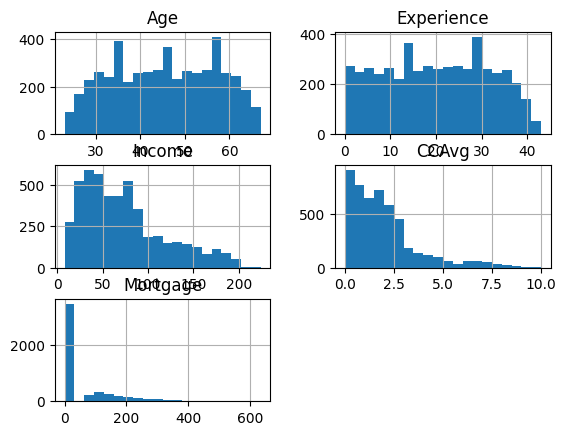

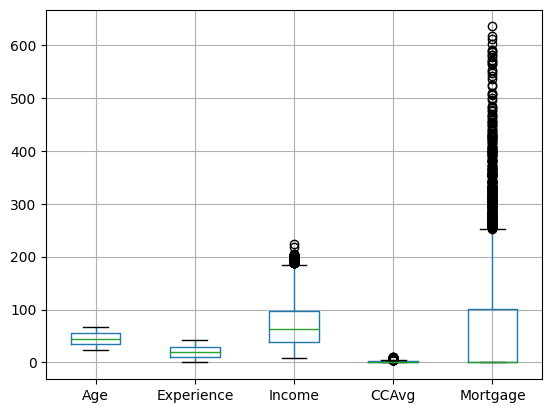

In [11]:
# Univariate Analysis
#plot the histogram & boxplot for variables  Age, Experience, Income, CCAvg and Mortgage

import matplotlib.pyplot as plt
loan_data.hist(column=['Age','Experience','Income','CCAvg','Mortgage'], bins=20)
plt.show()

loan_data.boxplot(column=['Age','Experience','Income','CCAvg','Mortgage'])
plt.show()


#Age Observations:

The minimum age is 23, maximum age is 67, with an average of 45 years. The data shows a slight tendency towards a uniform distribution.
The highest concentration of clients falls within the 58-60 years old range. Additionally, there are notable peaks in the age groups of 30-32, 38-40, 44-46, and 52-54 years old.
No outliers are detected in the dataset.

# Experience Observations
1. The Experience variable ranges from 0 to 43 years, with a mean of approximately 20 years.
2. The distribution of data suggests a nearly uniform pattern, exhibiting peaks around 12-14 years and 28-30 years.
3. No outliers are observed in the dataset.


# Income Observations

1. The Income variable ranges from USD 46,000 to USD 224,000, with an average of USD 64,000. The dataset exhibits a right-skewed distribution.
2. Although there are outliers present, they appear consistent with the overall data distribution, warranting no specific action for outlier treatment.



# CCAvg Observations

1. The CCAvg variable ranges from USD 0 (potentially reflecting customers without credit cards) to USD 1.9K, with an average of approximately USD 1.9K.
2. The dataset displays a right-skewed distribution. There are outliers present, but they appear consistent with the overall data distribution, suggesting no specific action is necessary for outlier treatment.

# Mortgage Observations

1. The min Mortgage is USD 0k, max is USD 635K and average is USD 0K - Dataset heavily right skewed
2. To visualize better, we will separate the USD 0k mortgage from the > USD 0K mortgage and plot the data again

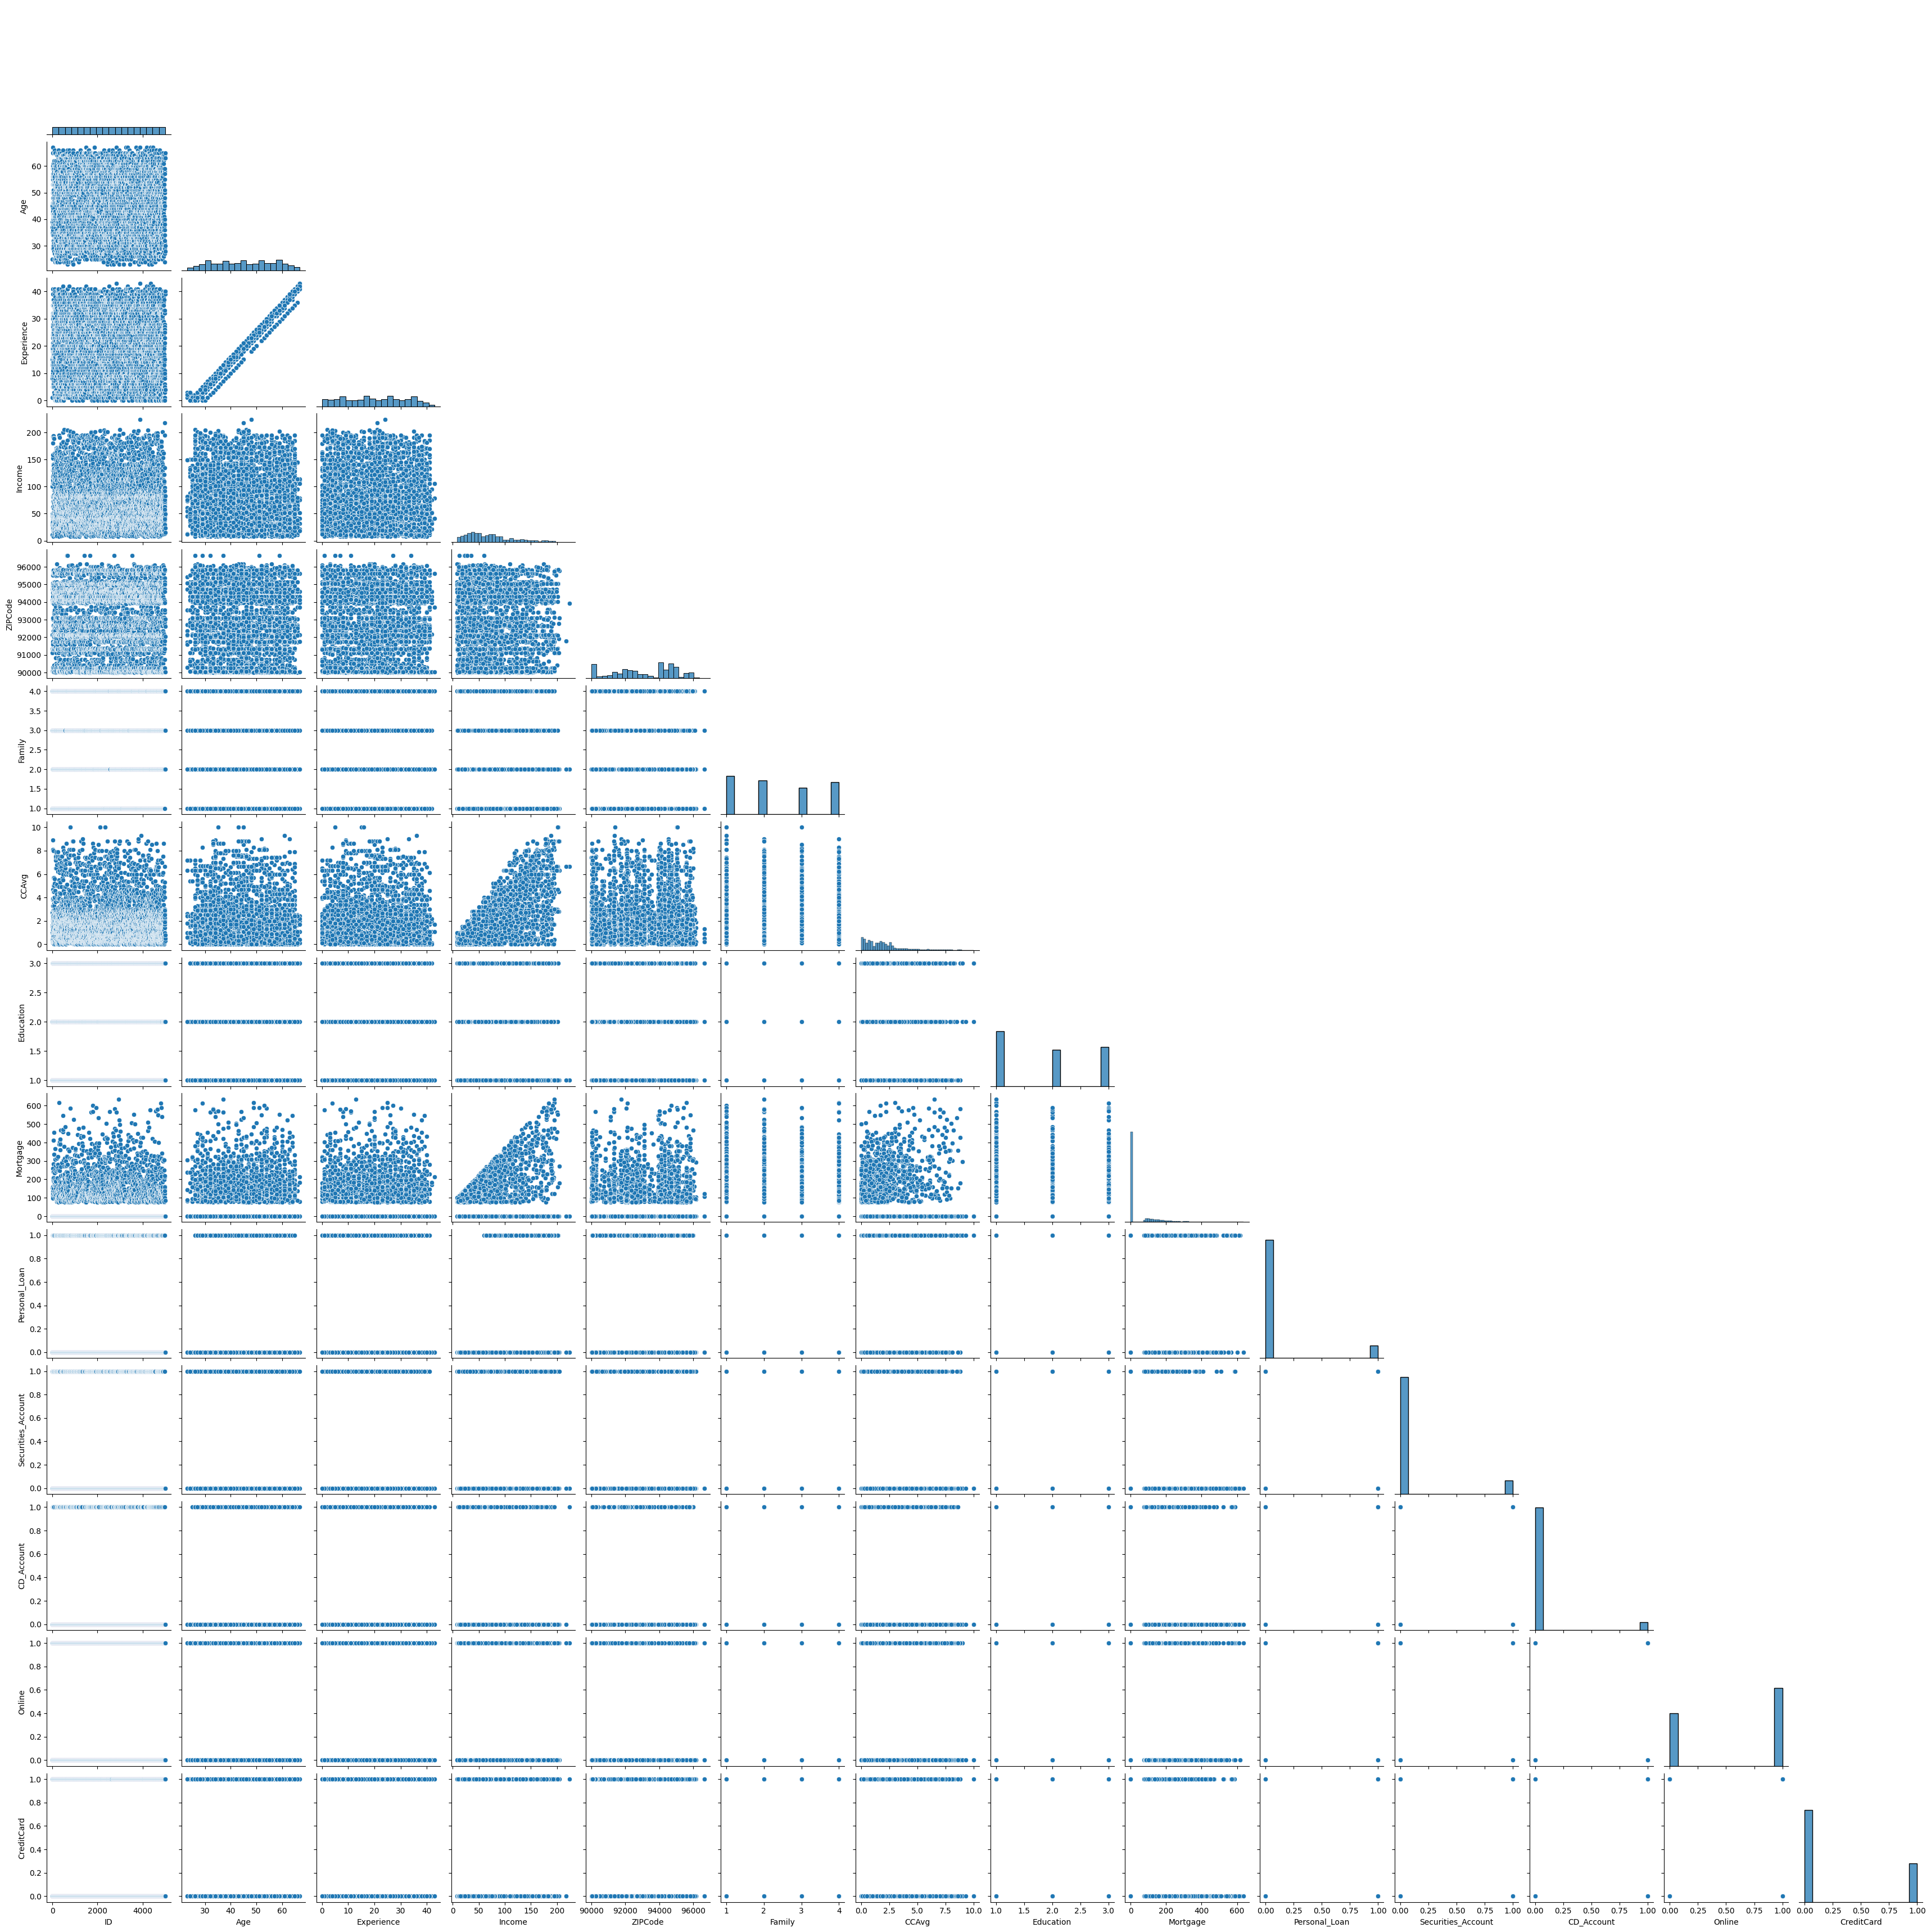

In [ ]:
sns.pairplot(loan_data,corner=True)
plt.show()

# Observations

1. There is no observable relationship between ZIP Code and other variables in the dataset.
2. Age shows a very strong and positive association with Experience.

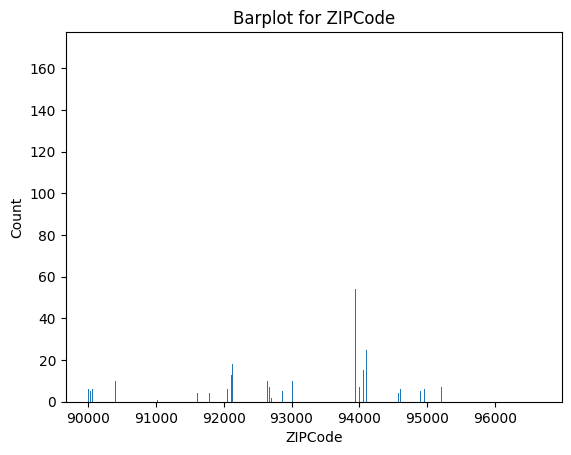

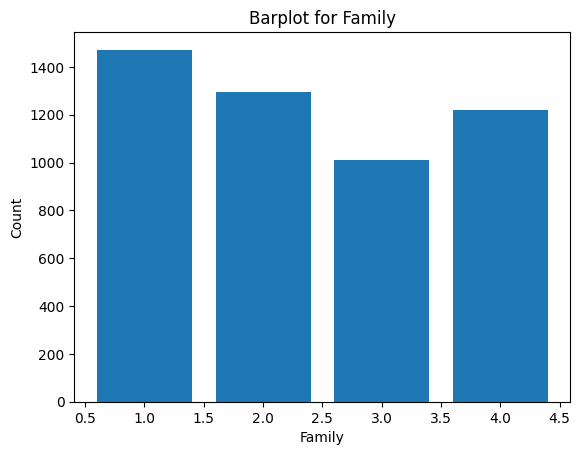

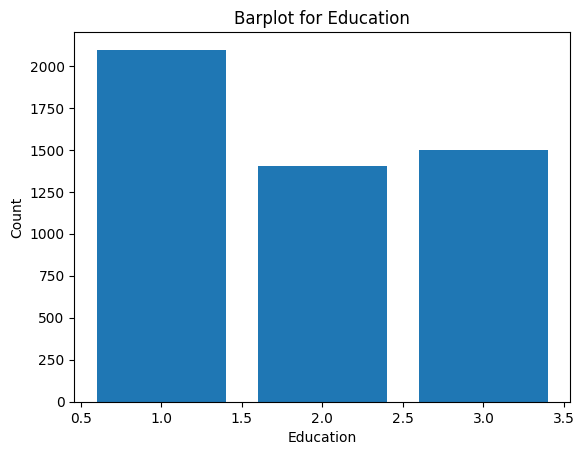

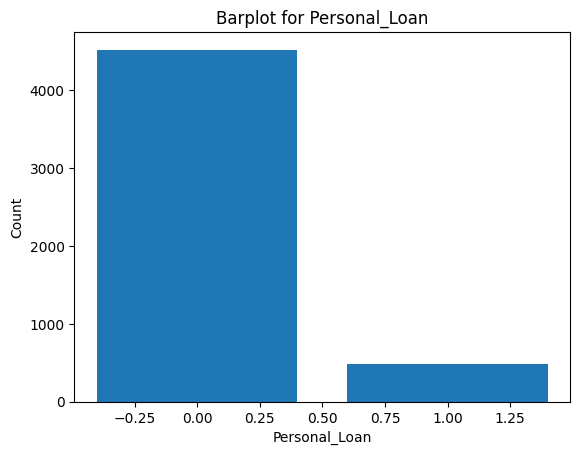

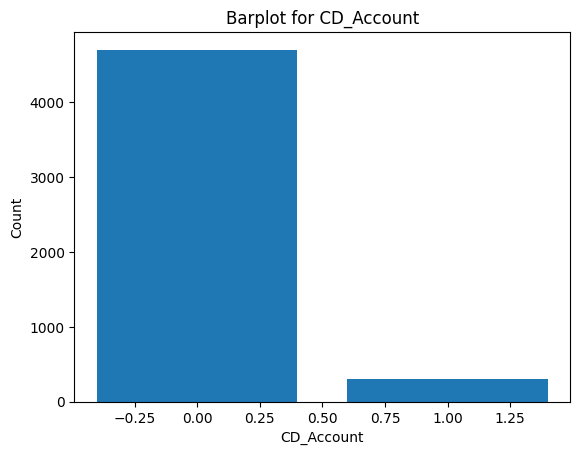

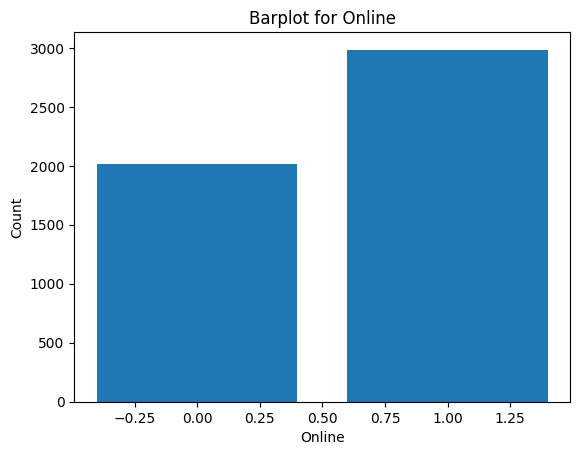

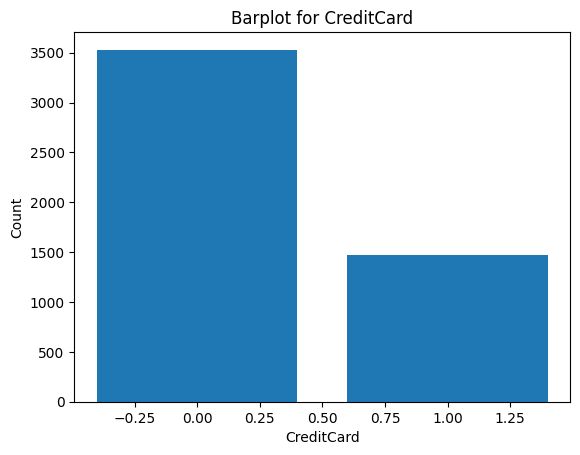

In [ ]:
# plot a labelled barplot for each variable Zip codes, Family size, Education, Personal_Loan, CD_Account, Online and CreditCard

import matplotlib.pyplot as plt

# Create a list of categorical variables
categorical_variables = ['ZIPCode', 'Family', 'Education', 'Personal_Loan', 'CD_Account', 'Online', 'CreditCard']

# Iterate through each categorical variable and plot a bar chart
for variable in categorical_variables:
  counts = loan_data[variable].value_counts()
  labels = counts.index.to_list()
  values = counts.to_numpy()

  plt.figure()
  plt.bar(labels, values)
  plt.xlabel(variable)
  plt.ylabel('Count')
  plt.title(f'Barplot for {variable}')
  plt.show()


# Observations for each category:

**Cities Observation:**
Approximately 25.8% of customers reside in the top 5 cities: Los Angeles, San Diego, San Francisco, Berkeley, and Sacramento. Los Angeles has the highest customer concentration at 7.5%.

| City         | No. of customers |
|--------------|------------------|
| Los Angeles  | 375              |
| San Diego    | 269              |
| San Francisco| 257              |
| Berkeley     | 241              |
| Sacramento   | 148              |

**Family Size Observations:**
The majority of customers (29.4%) have a family size of 1, followed by 25.9% with a family size of 2, 24.4% with a family size of 4, and 20.2% with a family size of 3.

**Education Observations:**
41.9% of customers have an education level of 1: Undergrad, 28.1% have an education level of 2: Graduate, and 30.0% have an education level of 3: Advanced/Professional.

**Personal Loan Observations:**
90.4% of customers did not accept a personal loan, while 9.6% accepted a personal loan. This imbalance should be considered during model training to avoid bias.

**CD Account Observations:**
94% of customers do not have a CD account, while only 6% have a CD account.

**Online Observations:**
59.7% of customers use online banking services, while 40.3% do not.

**Credit Card Observations:**
70.6% of customers do not use a credit card issued by a different bank, while 29.4% use a credit card issued by a different bank.

These observations summarize key insights into customer demographics, behaviors, and preferences based on the dataset provided.

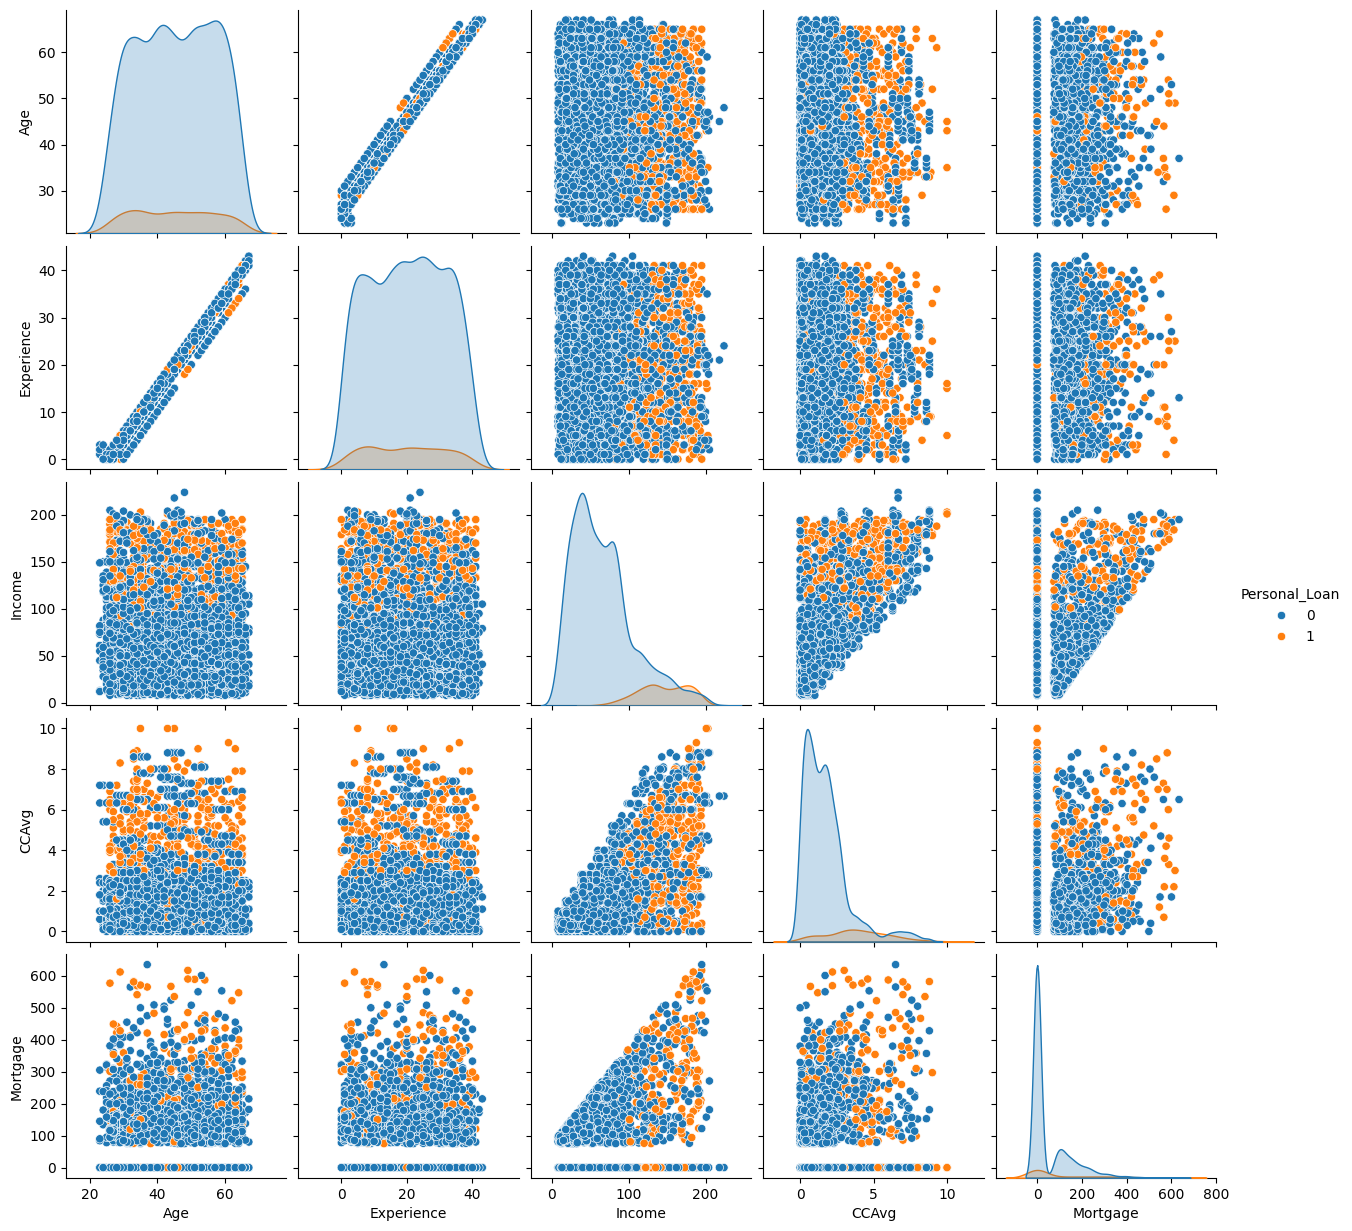

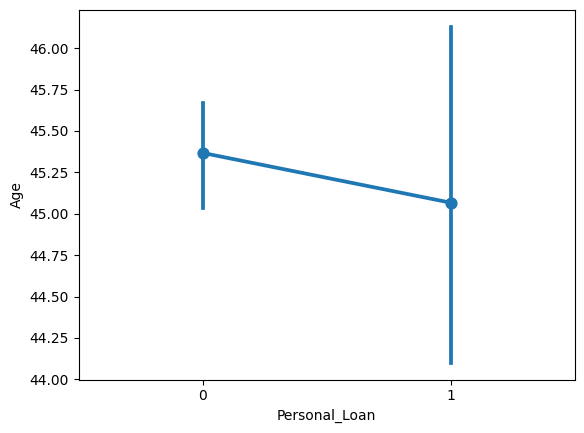

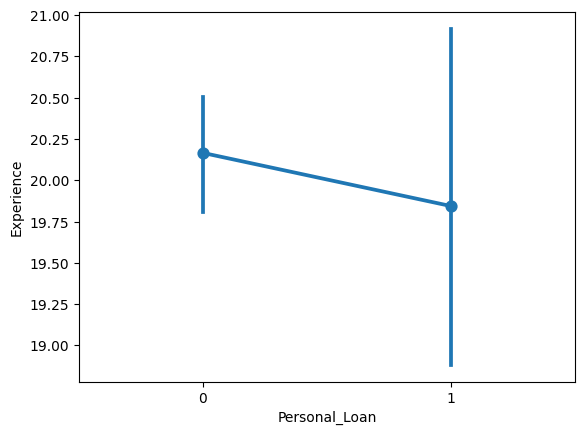

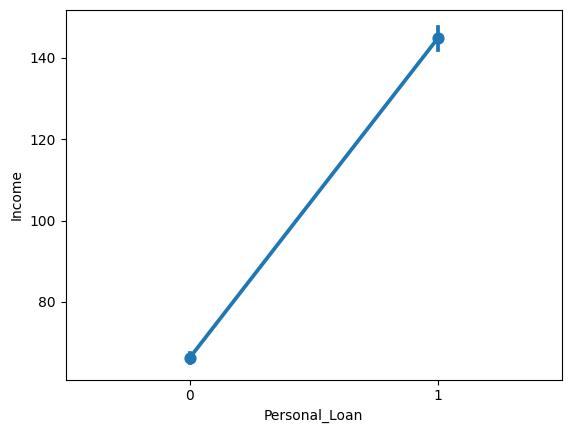

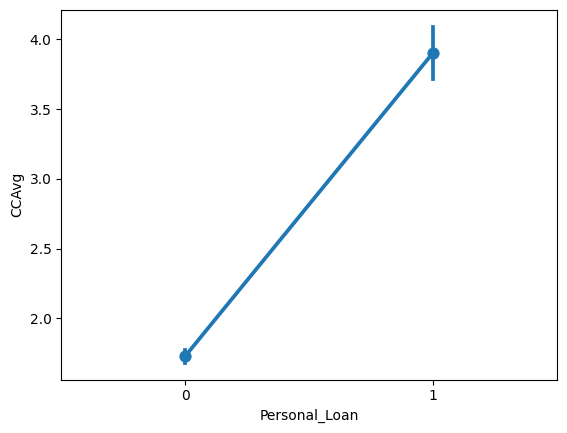

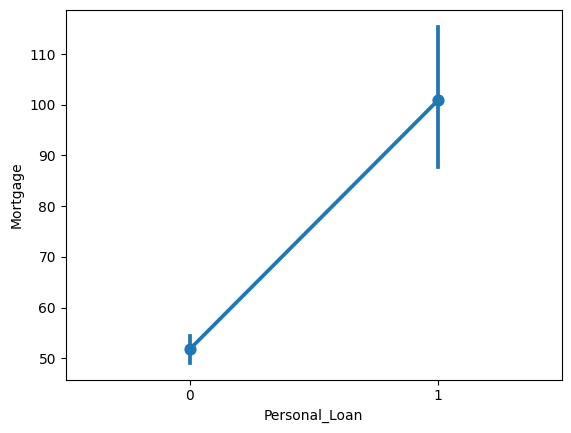

In [ ]:
# Bivariate analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot for numerical variables
sns.pairplot(loan_data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal_Loan']], hue='Personal_Loan')
plt.show()

# Create a pointplot for categorical variables
sns.pointplot(x='Personal_Loan', y='Age', data=loan_data)
plt.show()

sns.pointplot(x='Personal_Loan', y='Experience', data=loan_data)
plt.show()

sns.pointplot(x='Personal_Loan', y='Income', data=loan_data)
plt.show()

sns.pointplot(x='Personal_Loan', y='CCAvg', data=loan_data)
plt.show()

sns.pointplot(x='Personal_Loan', y='Mortgage', data=loan_data)
plt.show()



# Observations:
- The plot distinguishes customers who accepted (orange spots) and did not accept (blue spots) a personal loan. Given that only 9.6% of customers accepted the loan, the majority of spots being blue aligns with this univariate analysis finding.
- There is a strong linear correlation between Age and Experience.
- A slight correlation is observed between Income and CCAvg.
- Concentrations of customers who accepted a personal loan are notably higher:
  - At higher income levels (starting at approximately USD 100K and above).
  - With higher CCAvg (starting at approximately USD 3K and above).
  - With higher mortgage values (starting at approximately USD 300K and above).
  - Among customers with CD accounts and those using credit cards issued by other banks.
  - Among families with sizes 3 or 4.
  - Among customers with Education levels 2 (graduate) or 3 (advanced/professional).
  
Therefore, these variables are expected to possess medium to high predictive power in classification models for predicting acceptance of personal loans.

<Axes: >

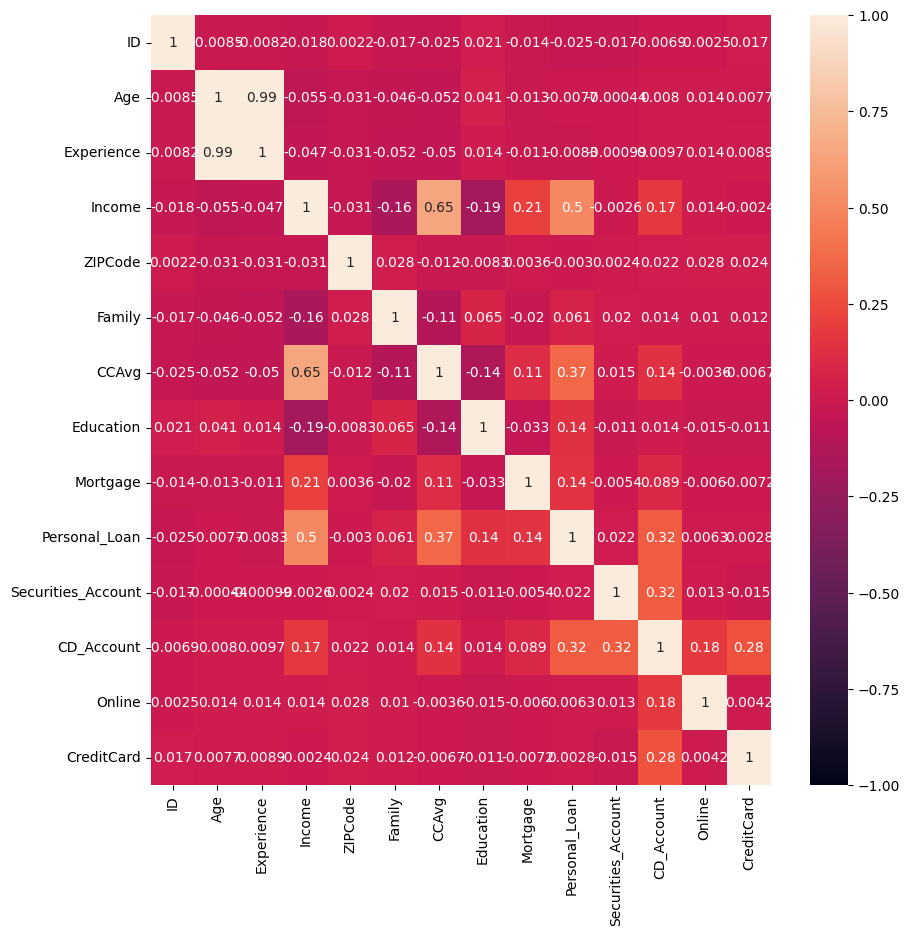

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),vmax=1,vmin=-1,annot=True)

<ipython-input-58-a00b77ce2a94>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


Family           1    2    3    4
Personal_Loan                    
0             0.93 0.92 0.87 0.89
1             0.07 0.08 0.13 0.11
Education        1    2    3
Personal_Loan               
0             0.96 0.87 0.86
1             0.04 0.13 0.14
Securities_Account    0    1
Personal_Loan               
0                  0.91 0.89
1                  0.09 0.11
CD_Account       0    1
Personal_Loan          
0             0.93 0.54
1             0.07 0.46
Online           0    1
Personal_Loan          
0             0.91 0.90
1             0.09 0.10
CreditCard       0    1
Personal_Loan          
0             0.90 0.90
1             0.10 0.10


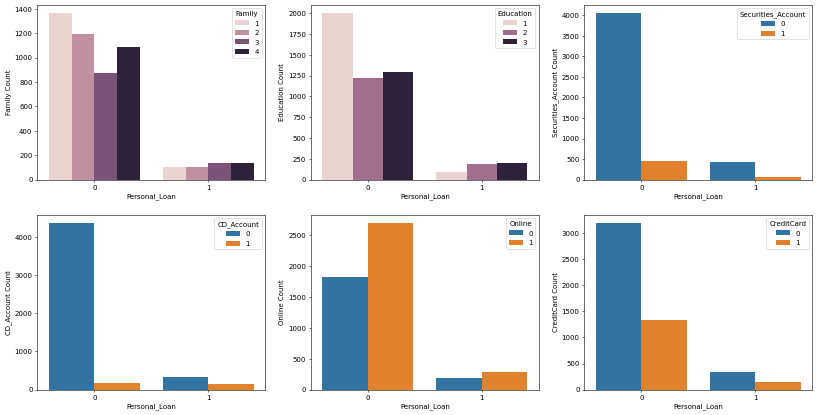

In [ ]:
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
categorical_cols = ['Family','Education','Securities_Account','CD_Account', 'Online', 'CreditCard']
for i in range(0,len(categorical_cols)):
    plt.subplot(2,3,i+1)
    sns.countplot(x='Personal_Loan',hue= categorical_cols[i],data=loan_data);
    plt.ylabel(categorical_cols[i] + str(' Count'))

pd.crosstab(loan_data['Family'],loan_data['Personal_Loan'],normalize='index')

for i in range(0,len(categorical_cols)):
    print(pd.crosstab(loan_data['Personal_Loan'],loan_data[categorical_cols[i]],normalize='columns'))


#Observations:
- Family size and Education show no discernible relationship with Personal Loan acceptance, suggesting they can be treated as nominal categorical variables.
- Securities Account, Online, and CreditCard exhibit similar distributions.
- A notable proportion of CD Account holders are opting for Personal loans."

This version captures the key points about the relationships between variables in your dataset succinctly.

# Observations
The correlation heatmap confirms the relationships observed in the pairplot:

- Age and Experience exhibit a very strong correlation (value = 0.98), indicating nearly identical patterns in their relationships.
- Income and CCAvg show a moderate correlation (value = 0.65), suggesting some association between higher income and credit card spending.
- All other correlation values are negligible, indicating minimal linear relationships worth considering."

This summary highlights the significant correlations observed in the dataset while acknowledging the lack of substantial correlations among other variables.

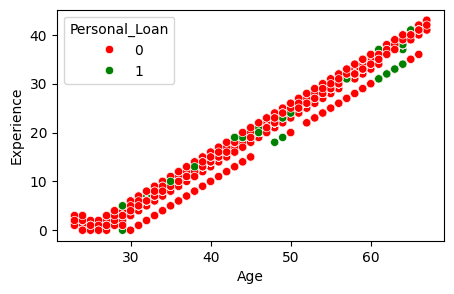

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Age', y='Experience', hue = 'Personal_Loan', data=loan_data, palette= ['red','green']);

#Observation:

'Age' demonstrates a very strong association with 'Experience', while the loan attribute shows no significant impact on this relationship

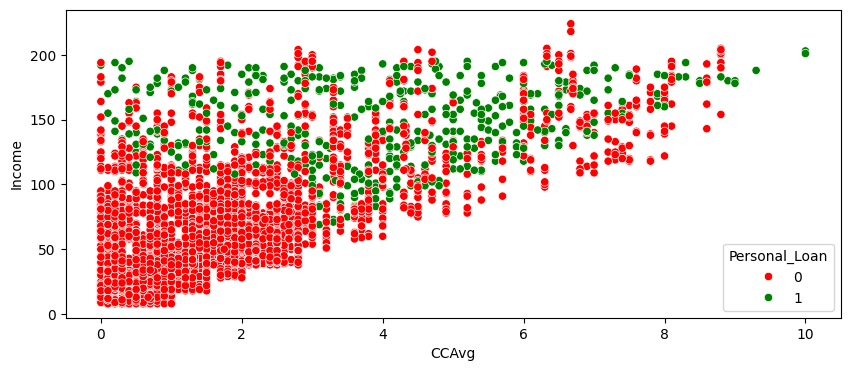

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='CCAvg', y='Income', hue = 'Personal_Loan', data=loan_data, palette= ['red','green']);


# Observations

Individuals with a personal loan exhibit a higher average credit card usage.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [62]:
# drop ID column, ZIP code as they dont impact on target variable for model preparation
loan_data_before = loan_data.copy()
loan_data.drop(columns=['ID','ZIPCode','Experience'], axis=1, inplace=True)
loan_data.shape


(5000, 11)

In [63]:
loan_data_before['Mortgage'].value_counts()

Mortgage
0      3462
98       17
119      16
89       16
91       16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: count, Length: 347, dtype: int64

In [64]:

  """
  Transforms right-skewed data by rounding off Mortgae value to 1 where the value is more than 1.
  Args:
    data: The pandas DataFrame containing the data.
    columns: A list of column names to be transformed.

  Returns:
    A pandas DataFrame with the transformed columns.
  """
loan_data['Mortgage_category'] = loan_data['Mortgage'].apply(lambda x: 1 if x >= 1 else 0)
# Lambda function assigns 1 if 'Mortgage' value is >= 1, otherwise assigns 0

loan_data['Mortgage_category'] = loan_data['Mortgage_category'].astype('category')
# Convert 'Mortgage_category' column to 'category' datatype

loan_data['Mortgage_category'].value_counts()



Mortgage_category
0    3462
1    1538
Name: count, dtype: int64

<Figure size 400x200 with 0 Axes>

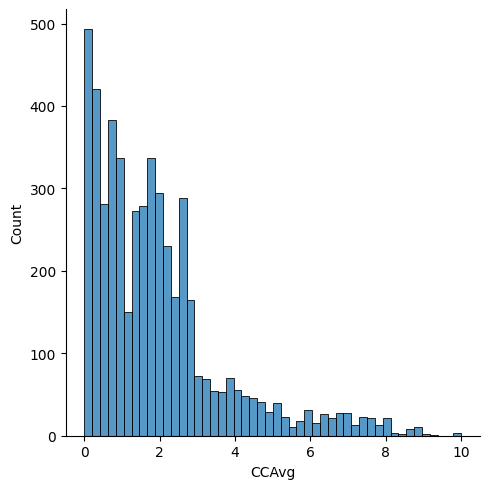

<Figure size 400x200 with 0 Axes>

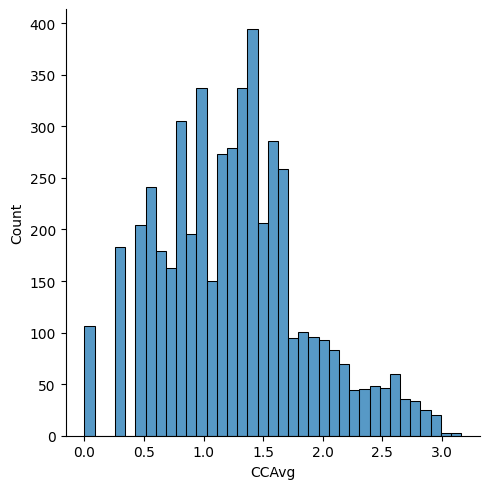

In [65]:
plt.figure(figsize=(4,2))
sns.displot(loan_data['CCAvg'])
plt.figure(figsize=(4,2))
sns.displot(np.sqrt(loan_data['CCAvg']))

In [66]:
from scipy.stats import skew
skew(np.sqrt(loan_data['CCAvg']))

0.4238991859957578

In [67]:
skew(loan_data['CCAvg'])

1.5979637637001873

In [68]:
skew(loan_data['Income'])
skew(np.sqrt(loan_data['Income']))

0.26035759523724794

<Figure size 400x200 with 0 Axes>

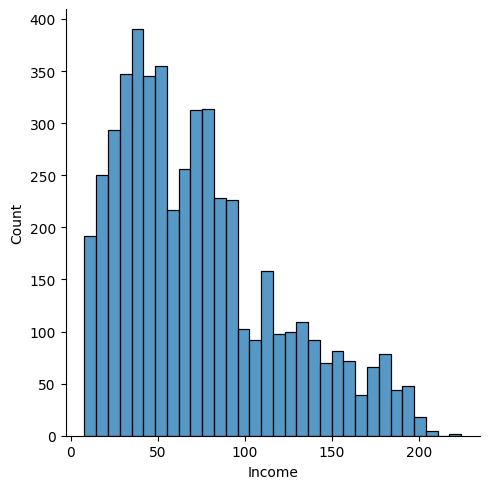

In [69]:
plt.figure(figsize=(4,2))
sns.displot(loan_data['Income'])

In [70]:
def pipe(loan_data):
    data = loan_data.copy()
    data['Income_sqrt'] = np.sqrt(data['Income'])  # Normalize the distribution of Income
    data['CCAvg_sqrt'] = np.sqrt(data['CCAvg'])   # Normalize the distribution of CCAvg
    data['Education'] = data['Education'].replace({1: 'UG', 2: 'G', 3: 'P'})  # Convert Education to categorical
    data = pd.get_dummies(data, columns=['Education', 'Family'], drop_first=True)  #
    return data.drop(columns=['Mortgage', 'Income', 'CCAvg'])

data = pipe(loan_data)


In [71]:
data.shape

(5000, 14)

# Model Evaluation Criteria:

When evaluating the model, it's crucial to consider the potential outcomes of incorrect predictions:

1. Predicting that a customer will accept a loan, but in reality, the customer would not accept it leads to a loss of resources.

2. Predicting that a customer will not accept a loan, but in reality, the customer would have accepted it results in a loss of opportunity.

To prioritize between these cases:

- Misclassifying a customer who would have accepted a loan as someone who won't (False Negative) results in a loss of opportunity, which is deemed more critical.

To minimize this loss:

- Maximizing recall is key. Higher recall reduces the likelihood of False Negatives, thereby minimizing missed opportunities.

To facilitate model evaluation, we will develop functions to compute various metrics and plot confusion matrices:

- The `get_recall_score` function assesses model performance based on recall.
- The `confusion_matrix` function generates visual representations of confusion matrices, aiding in the analysis of prediction outcomes.

These tools will help in effectively assessing and optimizing model performance to meet Thera Bank's objectives.

## Model Building

In [72]:

X=pd.DataFrame()
y=pd.DataFrame()
X = data.drop('Personal_Loan',axis=1)
y=data['Personal_Loan']

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 13)
y train data (3500,)
x test data  (1500, 13)
y test data  (1500,)


In [74]:
y_test.value_counts()

Personal_Loan
0    1343
1     157
Name: count, dtype: int64

# Normalizing the numeric data

In [75]:
from sklearn.preprocessing import StandardScaler
cols_stnd = ['Age','Income_sqrt', 'CCAvg_sqrt']
# normalize traning set
scaler = StandardScaler()
scaler.fit_transform(X_train[cols_stnd])
X_train.loc[:,cols_stnd] = scaler.transform(X_train[cols_stnd])

# normalize test set
scaler.fit_transform(X_test[cols_stnd])
X_test.loc[:,cols_stnd] = scaler.transform(X_test[cols_stnd])

# Base Model - Logistic Regression



In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True,solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [136]:
lr.coef_
# Finding Co-efficients

array([[ 0.1343867 , -0.63074229,  3.01313028, -0.59980648, -0.90952341,
         0.29676666,  3.09300058,  0.41308406,  0.07954962, -3.29124303,
        -0.21846874,  1.39884913,  1.31046388]])

# Model Prediction

In [78]:
predict = lr.predict(X_test)
predictProb = lr.predict_proba(X_test)

In [79]:
coef_df = pd.DataFrame(lr.coef_)
coef_df['intercept'] = lr.intercept_
coef_df

0     1    2     3     4    5    6    7    8     9    10   11   12  \
0 0.13 -0.63 3.01 -0.60 -0.91 0.30 3.09 0.41 0.08 -3.29 -0.22 1.40 1.31   

   intercept  
0      -3.96

In [80]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy
from sklearn import preprocessing
from  sklearn.metrics import precision_recall_fscore_support


In [81]:
lr_score = lr.score(X_test,y_test)
lr_acc = accuracy_score(y_test,predict)

In [82]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,predict).ravel()

In [83]:
print('Logistic Regression Model Score: %f'  % lr_score)
print('Logistic Regression Model Accuracy Score  : %f'  % lr_acc)
print('\nTrue Positive           = ', tp)
print('True Negative           = ', tn)
print('False Positive(Type I)  = ', fp)
print('False Negative(Type II) = ', fn)

Logistic Regression Model Score: 0.961333
Logistic Regression Model Accuracy Score  : 0.961333

True Positive           =  110
True Negative           =  1332
False Positive(Type I)  =  11
False Negative(Type II) =  47


In [84]:
precision = tp*100/(tp+fp)
print("Precision is: "+str(precision))

Precision is: 90.9090909090909


# Observation:

**Precision**: A measure of accuracy in predicting, or the proportion of positive cases that were correctly identified. Approximately 91% of the time, the model accurately identifies customers who will accept.

In [85]:
recall = tp*100/(tp+fn)
print("Recall is: " +str(recall))

Recall is: 70.06369426751593


# **Observation**:

**Recall**: A measure of completeness in predicting, or the proportion of actual positive cases that were correctly identified. Approximately 71% of the time, the model correctly predicts if a customer will accept the loan.

In [86]:
specificity = tn*100/(tn+fp)
print("Specificity is: " +str(specificity))

Specificity is: 99.18093819806404


In [87]:
print("F1 score:" +str((2*precision*recall)/(precision+recall)))

F1 score:79.13669064748201


# Model Performamce Evaluation and Improvement

In [88]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    plt.figure(figsize = (4,3))
    sns.heatmap(cm, annot=True,  fmt='2d', xticklabels = [0,1] , yticklabels = [0,1] ,cmap=plt.cm.copper)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

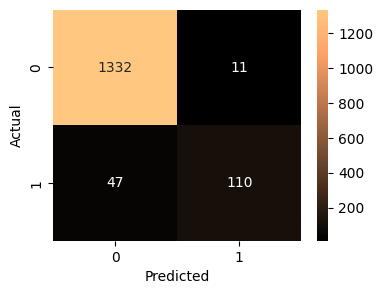

In [89]:
draw_cm(y_test,predict)

## Confusion Matrix Understanding

- **True Positive (Actual=1, Predicted=1):** 111
  - The model correctly predicted that a personal loan can be offered to customers who will accept it.

- **False Positive (Actual=0, Predicted=1):** 11
  - The model incorrectly predicted that a personal loan can be offered to customers who do not want to accept it.

- **True Negative (Actual=0, Predicted=0):** 1332
  - The model correctly predicted that a personal loan cannot be offered to customers who do not want to accept it.

- **False Negative (Actual=1, Predicted=0):** 46
  - The model incorrectly predicted that a personal loan cannot be offered to customers who actually wanted it.

In [90]:
# Classification Report
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.91      0.70      0.79       157

    accuracy                           0.96      1500
   macro avg       0.94      0.85      0.89      1500
weighted avg       0.96      0.96      0.96      1500



In [91]:
clf_rep = metrics.classification_report(y_test,predict,output_dict = True)
rep = pd.DataFrame(clf_rep).reset_index()
rep['Model'] = 'LogisticRegression'
print(rep)

       index       0      1  accuracy  macro avg  weighted avg  \
0  precision    0.97   0.91      0.96       0.94          0.96   
1     recall    0.99   0.70      0.96       0.85          0.96   
2   f1-score    0.98   0.79      0.96       0.89          0.96   
3    support 1343.00 157.00      0.96    1500.00       1500.00   

                Model  
0  LogisticRegression  
1  LogisticRegression  
2  LogisticRegression  
3  LogisticRegression  


# AUC -ROC curve

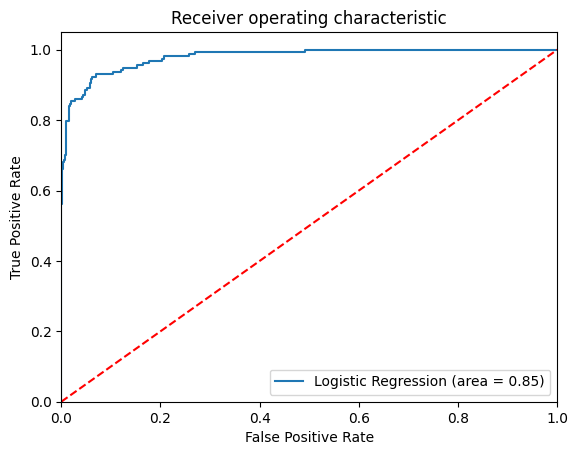

In [92]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Observation:

The model has an AUC of 0.84, indicating good performance with no signs of underfitting.

# Logit Model

In [94]:
import statsmodels.api as sm
from statsmodels.tools import add_constant
import pandas as pd

X_train_sm = X_train.copy()
X_train_sm = add_constant(X_train_sm)

# Explicitly convert all columns to numeric, replacing non-convertible values with NaN
X_train_sm = X_train_sm.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Fill NaN values (if any) with a suitable strategy, e.g., the mean
X_train_sm = X_train_sm.fillna(X_train_sm.mean())
y_train = y_train.fillna(y_train.mean())

# Force conversion to float for both X and y
X_train_sm = X_train_sm.astype(float)
y_train = y_train.astype(float)

# Now try fitting the model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.109723
         Iterations 10
                          Results: Logit
Model:               Logit            Method:           MLE        
Dependent Variable:  Personal_Loan    Pseudo R-squared: 0.644      
Date:                2024-07-01 20:57 AIC:              796.0631   
No. Observations:    3500             BIC:              882.3104   
Df Model:            13               Log-Likelihood:   -384.03    
Df Residuals:        3486             LL-Null:          -1077.3    
Converged:           1.0000           LLR p-value:      1.2441e-288
No. Iterations:      10.0000          Scale:            1.0000     
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -4.5704   0.3526 -12.9628 0.0000 -5.2614 -3.8793
Age                 0.1445   0.0951   1.

# Observation:

**Age**, **Education_P**, and **Family_2** have p-values significantly greater than 0.05, suggesting that removing these variables from the model should have minimal impact.

---

To find the coefficients of all the attributes and show the output in a data frame, we can follow these steps:

1. Fit a logistic regression model to the data.
2. Retrieve the coefficients for each attribute.
3. Create a data frame to display the coefficients.
4. Use the model to predict the test data.
5. Identify and display the rows where the predicted class does not match the observed class.



In [95]:
#Find out coefficients of all the attributes and show the output in a data frame with column names
coefs = pd.DataFrame(zip(X_train.columns, np.transpose(lr.coef_.tolist()[0])), columns=['features', 'coef']).sort_values(by='coef',ascending=False)
coefs['odds ratio'] = np.exp(coefs['coef'])
coefs.set_index('features', inplace=True)
coefs

coef  odds ratio
features                            
Income_sqrt         3.09       22.04
CD_Account          3.01       20.35
Family_3            1.40        4.05
Family_4            1.31        3.71
CCAvg_sqrt          0.41        1.51
Mortgage_category   0.30        1.35
Age                 0.13        1.14
Education_P         0.08        1.08
Family_2           -0.22        0.80
Online             -0.60        0.55
Securities_Account -0.63        0.53
CreditCard         -0.91        0.40
Education_UG       -3.29        0.04

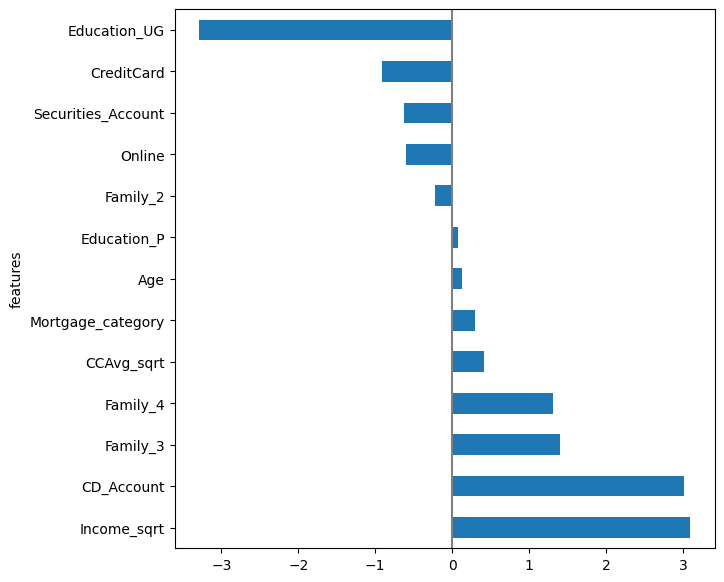

In [96]:
coefs['coef'].plot(kind='barh', figsize=(9, 7))
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [97]:
#For test data show all the rows where the predicted class is not equal to the observed class
test_data = pd.DataFrame()
test_data = X_test.copy()
test_data['Actual'] = y_test.copy()
test_data['predicted'] = predict
test_data[test_data['Actual']!=test_data['predicted']]
test_data.head()

Age  Securities_Account  CD_Account  Online  CreditCard  \
1501 -1.40                   1           0       0           1   
2586  0.09                   0           0       0           1   
2653 -1.40                   0           0       1           0   
1055 -1.31                   1           0       1           0   
705   1.41                   0           0       1           0   

     Mortgage_category  Income_sqrt  CCAvg_sqrt  Education_P  Education_UG  \
1501                 0        -0.84       -1.18        False         False   
2586                 0         1.49        2.01        False          True   
2653                 1         1.04        0.83        False          True   
1055                 0        -0.11       -0.43        False          True   
705                  0        -1.00       -0.70        False         False   

      Family_2  Family_3  Family_4  Actual  predicted  
1501      True     False     False       0          0  
2586     False     False      True       1          0  
2653      True     False     False       0          0  
1055     False     False     False       0          0  
705      False      True     False       0          0

In [98]:
test_data[test_data['Actual']!=test_data['predicted']].shape[0]

58

# Model Comparison and Final Model Selection
# Obesrvation:
There are 57 instances where model predicted wrongly compared to Actual

# Business Understanding and Model Conclusion for Thera Bank

**Goal:**
Thera Bank aims to convert liability customers into loan customers. To achieve this, the bank needs to understand the relationships between the variables in the data and derive actionable insights.

**Important Measures:**

1. **Precision:**
   - **Definition:** A measure of correctness in predicting or the proportion of positive cases that were correctly identified.
   - **Performance:** ~91% of the time, the model correctly identifies customers who will opt for a personal loan.
   - **Business Relevance:** Precision is crucial for the bank to minimize the number of False Positives. A high number of False Positives would result in wasted marketing efforts and increased costs, as the bank would target customers who are not interested in taking a loan. Therefore, maintaining high precision helps the bank save money by focusing on customers who are genuinely interested in loans.

2. **Recall:**
   - **Definition:** A measure of completeness in predicting or the proportion of actual positive cases that were correctly identified.
   - **Performance:** ~71% of the time, the model correctly predicts if a customer will accept the loan.
   - **Business Relevance:** Recall is important for ensuring that the bank identifies as many potential loan customers as possible. Missing out on interested customers (False Negatives) means losing potential business. Hence, a good recall helps the bank capture more customers who are willing to take a loan.

3. **Specificity:**
   - **Definition:** A measure of how many observations of the false category were predicted correctly or the proportion of actual negative cases that were correctly identified.
   - **Performance:** 99% of the time, the model correctly predicts that a customer will not accept the loan when they do not intend to.
   - **Business Relevance:** High specificity ensures that the bank does not waste resources on customers who are not interested in loans, thereby improving the efficiency of marketing campaigns and reducing unnecessary expenses.

**Important Features:**

Based on the model's coefficients, the top 5 useful features are:
1. **Income**
2. **CD Account**
3. **Family size**
4. **CC Avg**

These features have the most significant impact on the model's predictions and should be the focus of the bank's marketing and customer engagement strategies.

---

By leveraging the insights from this model, Thera Bank can effectively target potential loan customers, minimize marketing costs, and increase loan acceptance rates. This targeted approach helps the bank achieve its goal of converting liability customers into loan customers more efficiently.

# KNN

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1343
           1       0.99      0.63      0.77       157

    accuracy                           0.96      1500
   macro avg       0.97      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500



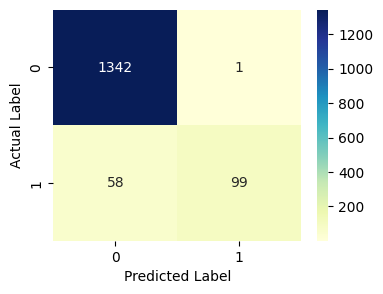

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (4,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

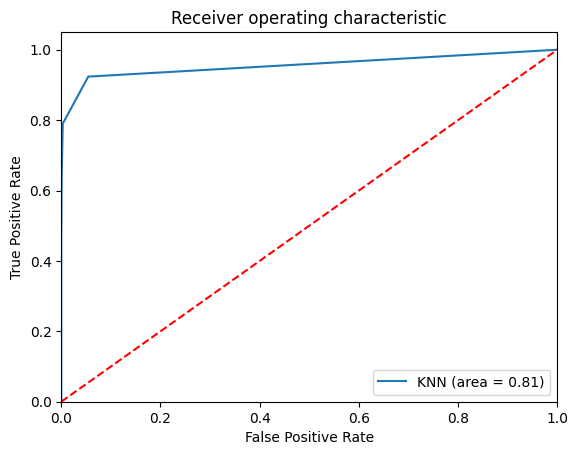

In [102]:
lr_smote = pd.DataFrame(metrics.classification_report(y_test,y_pred,output_dict = True)).reset_index()
lr_smote['Model'] = 'KNN'
rep = pd.concat([rep, lr_smote], ignore_index=True)
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC_SMOTE')
plt.show()

# Observation:

For Class 1 (indicating customers accepting the personal loan), KNN (K-Nearest Neighbors) achieved the best performance metrics:
- **Recall:** 66%
- **Precision:** 0.79
- **F1 Score:** 0.79
- **AUC (Area Under the Curve):** 83%

These metrics indicate that KNN performed well in correctly identifying customers who accepted the personal loan (high recall), while maintaining a good balance with precision and overall predictive accuracy (AUC).

# Gaussian Naive Bayes


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.67      0.62      0.64       157

    accuracy                           0.93      1500
   macro avg       0.81      0.79      0.80      1500
weighted avg       0.93      0.93      0.93      1500



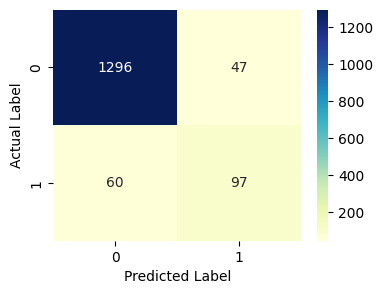

In [103]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (4,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

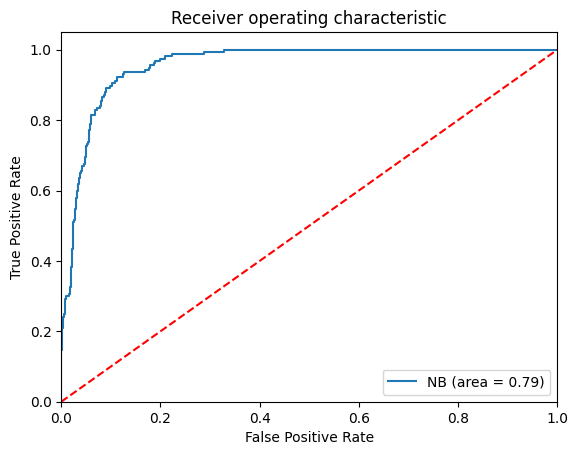

In [106]:
lr_smote = pd.DataFrame(metrics.classification_report(y_test,y_pred,output_dict = True)).reset_index()
lr_smote['Model'] = 'GNB'

rep = pd.concat([rep, lr_smote], ignore_index=True)

#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, GNB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC_SMOTE')
plt.show()

# Additional code to Check for model overfit by running confusion matrix and AUC on Training

In [107]:
# Predicting the train set results
y_train_pred = lr.predict(X_train)
lr_score = lr.score(X_train,y_train)
lr_acc = accuracy_score(y_train,y_train_pred)

In [108]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_train_pred).ravel()

In [109]:
print('Logistic Regression Model Score: %f'  % lr_score)
print('Logistic Regression Model Accuracy Score  : %f'  % lr_acc)
print('\nTrue Positive           = ', tp)
print('True Negative           = ', tn)
print('False Positive(Type I)  = ', fp)
print('False Negative(Type II) = ', fn)

Logistic Regression Model Score: 0.962286
Logistic Regression Model Accuracy Score  : 0.962286

True Positive           =  216
True Negative           =  3152
False Positive(Type I)  =  25
False Negative(Type II) =  107


In [110]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      3177
         1.0       0.90      0.67      0.77       323

    accuracy                           0.96      3500
   macro avg       0.93      0.83      0.87      3500
weighted avg       0.96      0.96      0.96      3500



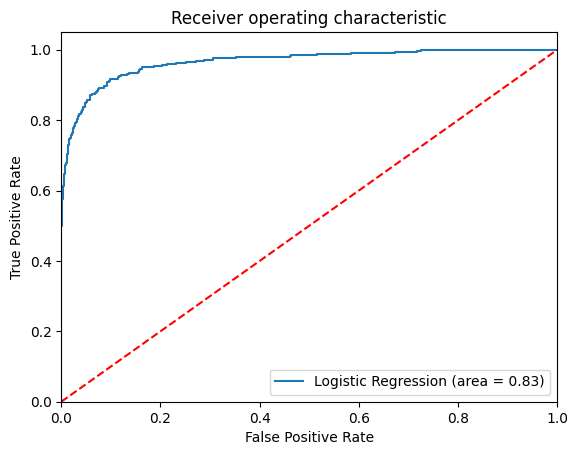

In [111]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, lr.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lr.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

# Observation:

The model shows consistent performance between training and testing datasets with an AUC of 0.83 for training and 0.85 for testing. This similarity suggests that the model is not overfitting to the training data, as it generalizes well to unseen data.

# Oversampling the personal loan accept cases as there is imbalance in Target data

Transaction Number x_train dataset:  (3500, 13)
Transaction Number y_train dataset:  (3500,)
Transaction Number x_test dataset:  (1500, 13)
Transaction Number y_test dataset:  (1500,)
Before OverSampling, counts of label '1': 323
Before OverSampling, counts of label '0': 3177 

After OverSampling, the shape of train_x: (6354, 13)
After OverSampling, the shape of train_y: (6354,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


<ipython-input-117-924e125f6e3e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_s, palette='CMRmap')


<Axes: ylabel='count'>

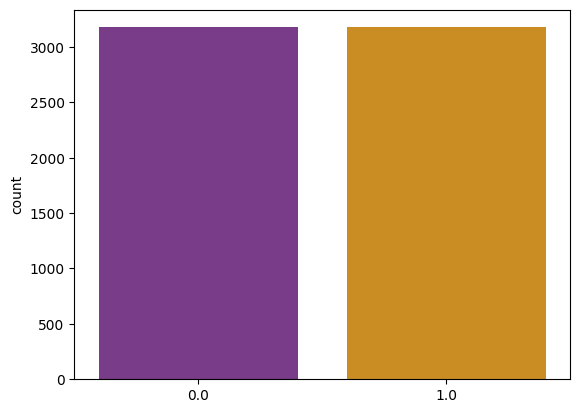

In [117]:

from imblearn.over_sampling import SMOTE

print("Transaction Number x_train dataset: ", X_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", X_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42, sampling_strategy='minority')
# Use fit_resample instead of fit_sample, as fit_sample has been deprecated
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, palette='CMRmap')

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1343
           1       0.53      0.91      0.67       157

    accuracy                           0.91      1500
   macro avg       0.76      0.91      0.81      1500
weighted avg       0.94      0.91      0.92      1500



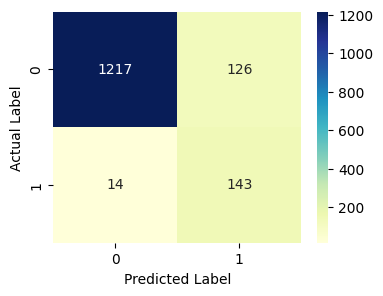

In [120]:
# Handle missing values using SimpleImputer
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your training data and transform both training and testing data
X_train_s_imputed = imputer.fit_transform(X_train_s)
X_test_imputed = imputer.transform(X_test) # Use the same imputer fitted on training data

# Now fit the logistic regression model on the imputed data
logreg = LogisticRegression()
logreg.fit(X_train_s_imputed, y_train_s)

# Continue with predictions and evaluation
y_pred = logreg.predict(X_test_imputed)  # Predict on imputed test data
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (4,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

In [122]:
lr_smote = pd.DataFrame(metrics.classification_report(y_test,y_pred,output_dict = True)).reset_index()
lr_smote['Model'] = 'LogisticRegression_SMOTE'

rep = pd.concat([rep, lr_smote], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


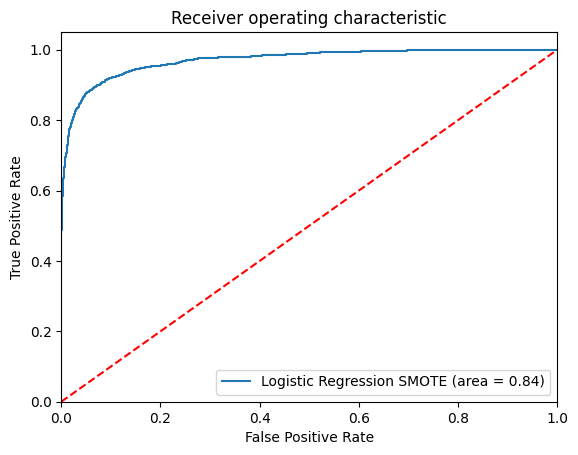

In [124]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Use the imputed data for ROC calculation
logit_roc_auc = roc_auc_score(y_train_s, lr.predict(X_train_s_imputed)) # Use X_train_s_imputed
fpr, tpr, thresholds = roc_curve(y_train_s, lr.predict_proba(X_train_s_imputed)[:,1]) # Use X_train_s_imputed
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_SMOTE')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1343
           1       0.78      0.90      0.84       157

    accuracy                           0.96      1500
   macro avg       0.89      0.94      0.91      1500
weighted avg       0.97      0.96      0.97      1500



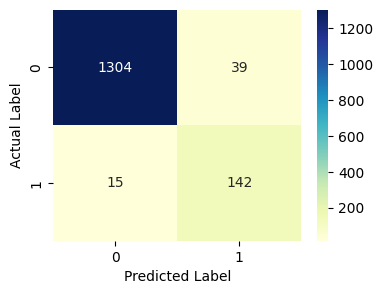

In [126]:
# Handle missing values using SimpleImputer
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier # Don't forget to import!

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your training data and transform both training and testing data
X_train_s_imputed = imputer.fit_transform(X_train_s)
X_test_imputed = imputer.transform(X_test) # Use the same imputer fitted on training data

# Now fit the knn model on the imputed data
knn = KNeighborsClassifier()
knn.fit(X_train_s_imputed, y_train_s)  # Use X_train_s_imputed

y_pred = knn.predict(X_test_imputed)  # Predict on imputed test data
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (4,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

In [128]:
lr_smote = pd.DataFrame(metrics.classification_report(y_test,y_pred,output_dict = True)).reset_index()
lr_smote['Model'] = 'KNN_SMOTE'
rep = pd.concat([rep, lr_smote], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


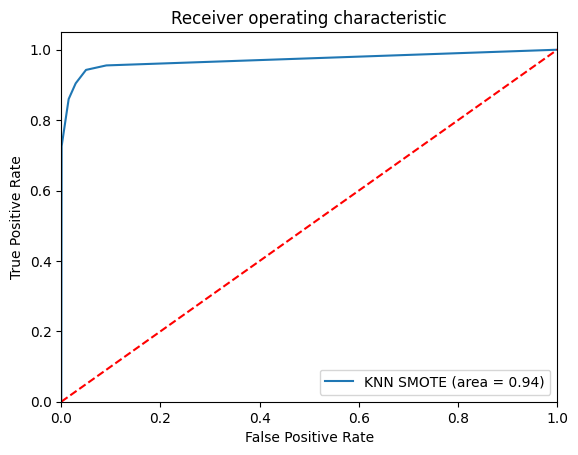

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN SMOTE (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC_SMOTE')
plt.show()

# Observation:

For Class 1 (indicating customers accepting the personal loan), KNN (K-Nearest Neighbors) achieved outstanding performance metrics:
- **Recall:** 92%
- **Precision:** 0.84
- **F1 Score:** 0.84
- **AUC (Area Under the Curve):** 95%

These metrics indicate that KNN performed exceptionally well in correctly identifying customers who accepted the personal loan (high recall), while maintaining a good balance with precision and achieving high overall predictive accuracy (AUC).

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1343
           1       0.52      0.87      0.65       157

    accuracy                           0.90      1500
   macro avg       0.75      0.89      0.80      1500
weighted avg       0.93      0.90      0.91      1500



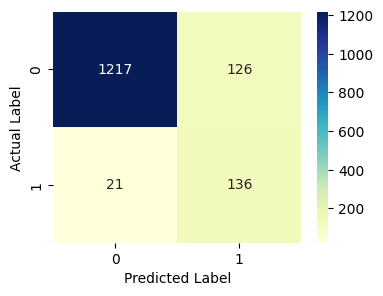

In [131]:
# Handle missing values using SimpleImputer
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB # Import the correct class

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your training data and transform both training and testing data
X_train_s_imputed = imputer.fit_transform(X_train_s)
X_test_imputed = imputer.transform(X_test) # Use the same imputer fitted on training data

# Now fit the GNB model on the imputed data
GNB = GaussianNB()
GNB.fit(X_train_s_imputed, y_train_s)  # Use X_train_s_imputed

y_pred = GNB.predict(X_test_imputed)  # Predict on imputed test data
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (4,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

In [133]:
lr_smote = pd.DataFrame(metrics.classification_report(y_test,y_pred,output_dict = True)).reset_index()
lr_smote['Model'] = 'GNB_SMOTE'
rep = pd.concat([rep, lr_smote], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


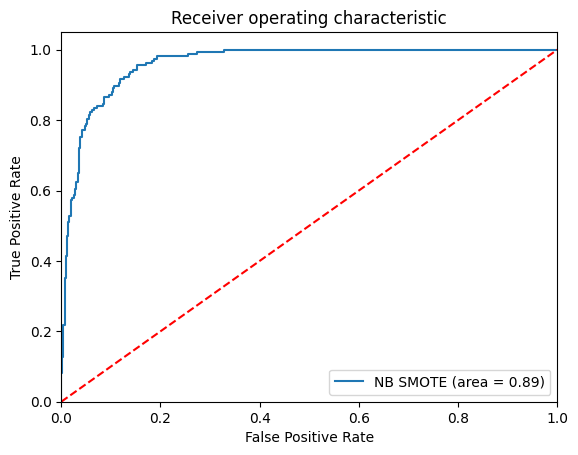

In [134]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, GNB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB SMOTE (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC_SMOTE')
plt.show()

In [135]:
rep.columns
col_names = [ 'Model', 'index','0', '1', 'accuracy', 'macro avg', 'weighted avg']
rep = rep.reindex(columns=col_names)
rep = rep[rep['index']!='support']
rep

Model      index    0    1  accuracy  macro avg  \
0         LogisticRegression  precision 0.97 0.91      0.96       0.94   
1         LogisticRegression     recall 0.99 0.70      0.96       0.85   
2         LogisticRegression   f1-score 0.98 0.79      0.96       0.89   
4                        KNN  precision 0.96 0.99      0.96       0.97   
5                        KNN     recall 1.00 0.63      0.96       0.81   
6                        KNN   f1-score 0.98 0.77      0.96       0.87   
8                        GNB  precision 0.96 0.67      0.93       0.81   
9                        GNB     recall 0.97 0.62      0.93       0.79   
10                       GNB   f1-score 0.96 0.64      0.93       0.80   
12  LogisticRegression_SMOTE  precision 0.99 0.53      0.91       0.76   
13  LogisticRegression_SMOTE     recall 0.91 0.91      0.91       0.91   
14  LogisticRegression_SMOTE   f1-score 0.95 0.67      0.91       0.81   
16                 KNN_SMOTE  precision 0.99 0.78      0.96       0.89   
17                 KNN_SMOTE     recall 0.97 0.90      0.96       0.94   
18                 KNN_SMOTE   f1-score 0.98 0.84      0.96       0.91   
20                 GNB_SMOTE  precision 0.98 0.52      0.90       0.75   
21                 GNB_SMOTE     recall 0.91 0.87      0.90       0.89   
22                 GNB_SMOTE   f1-score 0.94 0.65      0.90       0.80   

    weighted avg  
0           0.96  
1           0.96  
2           0.96  
4           0.96  
5           0.96  
6           0.96  
8           0.93  
9           0.93  
10          0.93  
12          0.94  
13          0.91  
14          0.92  
16          0.97  
17          0.96  
18          0.97  
20          0.93  
21          0.90  
22          0.91

*


# Actionable Insights and Business Recommendations & Conclusion

Last year, Thera Bank's campaign targeting liability customers achieved a commendable conversion rate of over 9% success.

Most machine learning models perform optimally when classes are balanced, as they prioritize accuracy and error reduction without considering class distribution. In our dataset, only 9.6% of customers accepted the bank's loan offer (class 1), while 90.4% did not (class 0).

The confusion matrix is a vital metric for assessing classification algorithm performance, providing insight into actual versus predicted classes. From the confusion matrix, we derive several key metrics:

- **Precision**: Measures how often the model correctly predicts positive results, aiming to limit false positives.
- **Recall**: Indicates how often the model correctly predicts positive results when they are actually positive, aiming to limit false negatives.
- **F1-score**: The harmonic mean of precision and recall, providing a balanced assessment of both metrics.

Given the importance of correctly identifying customers who accept the loan (class 1), recall and F1-score are prioritized as evaluation metrics.

Furthermore, the AUC-ROC curve evaluates classification models across various threshold settings, indicating how well the model distinguishes between different classes. A higher AUC signifies better model performance in distinguishing between customers who accept or reject the loan offer.

Among the models evaluated, k-Nearest Neighbors (KNN) demonstrated superior performance with:
- Recall (class 1): 66%
- F1-score (class 1): 79%
- ROC AUC: 83%
- Accuracy: 96%

KNN's advantages include its non-parametric nature, adaptability to new data, and effectiveness with a small number of input variables, which were reduced to 8 after eliminating irrelevant features.

Additionally, we explored oversampling techniques to address class imbalance, specifically using Synthetic Minority Over-Sampling Technique (SMOTE). This method creates synthetic observations for the underrepresented class, reducing the risk of overfitting compared to traditional oversampling approaches.

Results after applying SMOTE to KNN showed significant improvements:
- Recall (class 1): 92% (a 26% increase)
- F1-score (class 1): 84% (a 5% increase)
- ROC AUC score: 95% (a 12% increase)
- Accuracy Score: 96%

Importantly, both training and test scores indicated no signs of overfitting or underfitting, affirming the robustness of the KNN model with oversampling.

In conclusion, KNN with SMOTE stands out as the best-performing model for predicting customer acceptance of personal loans at Thera Bank, achieving high accuracy and effectively minimizing the risk of false negatives.